In [1]:
import pickle
import pandas as pd
import xgboost as xgb
from xgboost import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
import seaborn as sns
import sys
import pickle
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *

In [2]:
X, y, data = preparation_class_threshold()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')


### Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

### Trainning Baseline

Best parameters: {'n_estimators': 100}
Best score:  0.6208957958050372
-------------------------------------------------------------
Evaluation
Average training score:  0.6246428263945196
Average validation score:  0.6208957958050372
Accuracy:  0.6195749499631308
Precision:  0.5340058596979739
Recall:  0.6195749499631308
F1-Score:  0.501584624648539
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.30      0.01      0.01      1166
   Minor injury       0.24      0.00      0.00     10409
Property damage       0.48      0.08      0.13     17442
 Serious injury       0.63      0.97      0.76     46927

       accuracy                           0.62     75944
      macro avg       0.41      0.26      0.23     75944
   weighted avg       0.53      0.62      0.50     75944



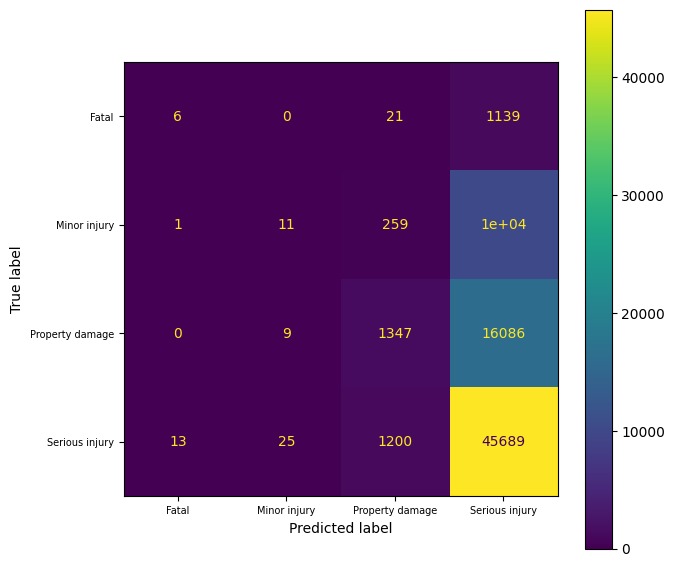

In [4]:
model = XGBClassifier(n_jobs=-1, random_state=42)    
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'n_estimators': [100]
}
grid_search = GridSearchCV(model, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_baseline = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/xgb_baseline.pkl', 'wb') as file:
    pickle.dump(model_baseline, file)

In [5]:
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), XGBClassifier(n_jobs=-1))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), XGBClassifier(n_jobs=-1))

### SMOTE

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.4299512129588079
-------------------------------------------------------------
Evaluation
Average training score:  0.4383258618273576
Average validation score:  0.4299512129588079
Accuracy:  0.41771568524175706
Precision:  0.520980537767237
Recall:  0.41771568524175706
F1-Score:  0.44887033745943783
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.07      0.33      0.11      1166
   Minor injury       0.20      0.35      0.25     10409
Property damage       0.34      0.42      0.37     17442
 Serious injury       0.67      0.44      0.53     46927

       accuracy                           0.42     75944
      macro avg       0.32      0.38      0.32     75944
   weighted avg       0.52      0.42      0.45     75944



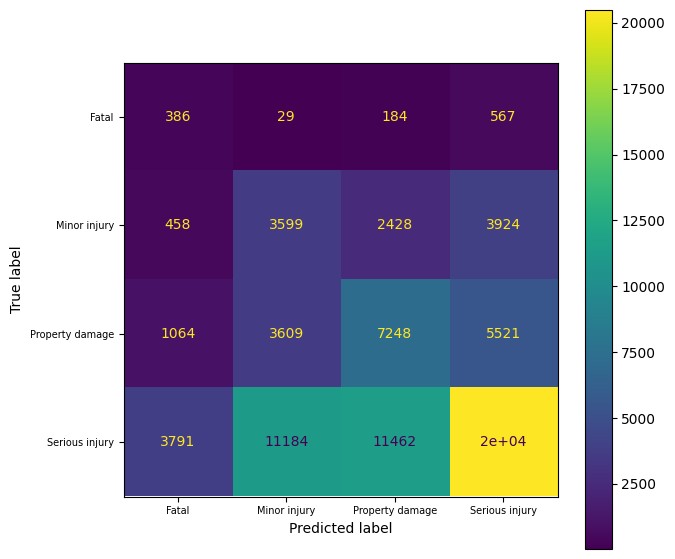

In [7]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smote = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/xgb_smote.pkl', 'wb') as file:
    pickle.dump(model_smote, file)

### Undersampling

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.2665139347662823
-------------------------------------------------------------
Evaluation
Average training score:  0.27260150319168286
Average validation score:  0.2665139347662823
Accuracy:  0.2553328768566312
Precision:  0.5220177836711751
Recall:  0.2553328768566312
F1-Score:  0.2657420556006132
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.05      0.70      0.09      1166
   Minor injury       0.18      0.48      0.26     10409
Property damage       0.33      0.40      0.36     17442
 Serious injury       0.68      0.14      0.24     46927

       accuracy                           0.26     75944
      macro avg       0.31      0.43      0.24     75944
   weighted avg       0.52      0.26      0.27     75944



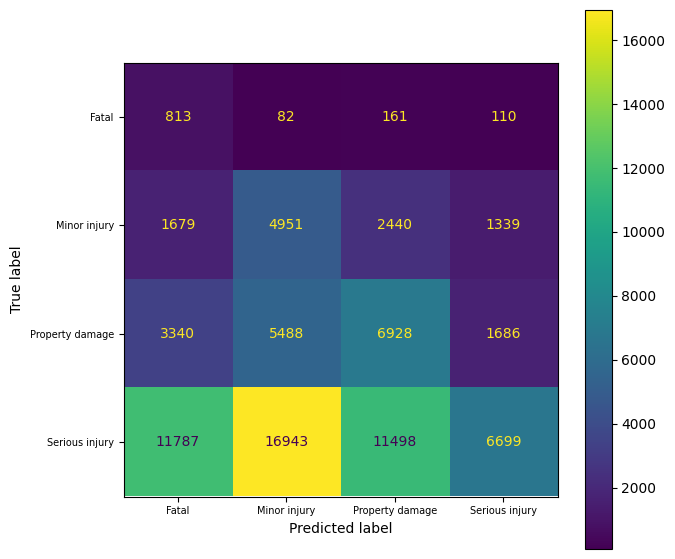

In [8]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_under, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_under = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/xgb_undersampling.pkl', 'wb') as file:
    pickle.dump(model_under, file)

### SMOTEENN

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.5739464257041623
-------------------------------------------------------------
Evaluation
Average training score:  0.5825687838212262
Average validation score:  0.5739464257041623
Accuracy:  0.5772279574423259
Precision:  0.5008757453368414
Recall:  0.5772279574423259
F1-Score:  0.5172364285331996
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.13      0.16      0.15      1166
   Minor injury       0.18      0.04      0.06     10409
Property damage       0.36      0.19      0.25     17442
 Serious injury       0.63      0.85      0.73     46927

       accuracy                           0.58     75944
      macro avg       0.33      0.31      0.30     75944
   weighted avg       0.50      0.58      0.52     75944



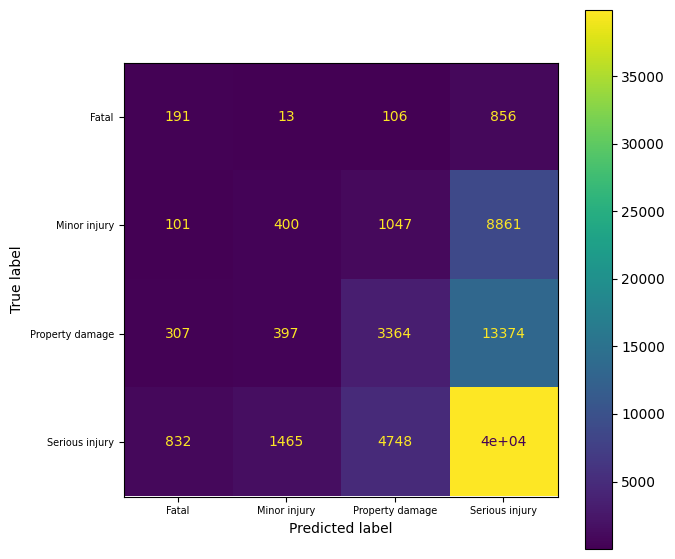

In [9]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smoteen, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_smoteenn = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_test, y_pred)
with open('Saved_models_remove/xgb_smoteenn.pkl', 'wb') as file:
    pickle.dump(model_smoteenn, file)

### SMOTE TOMEK

Best parameters: {'xgbclassifier__n_estimators': 100}
Best score:  0.42978991293855684
-------------------------------------------------------------
Evaluation
Average training score:  0.4380337023615965
Average validation score:  0.42978991293855684
Accuracy:  0.41792636679658696
Precision:  0.4011465877136774
Recall:  0.41792636679658696
F1-Score:  0.38677515735932405
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.33      0.07      0.11      5685
   Minor injury       0.35      0.20      0.25     18513
Property damage       0.42      0.34      0.38     21294
 Serious injury       0.44      0.67      0.53     30452

       accuracy                           0.42     75944
      macro avg       0.38      0.32      0.32     75944
   weighted avg       0.40      0.42      0.39     75944



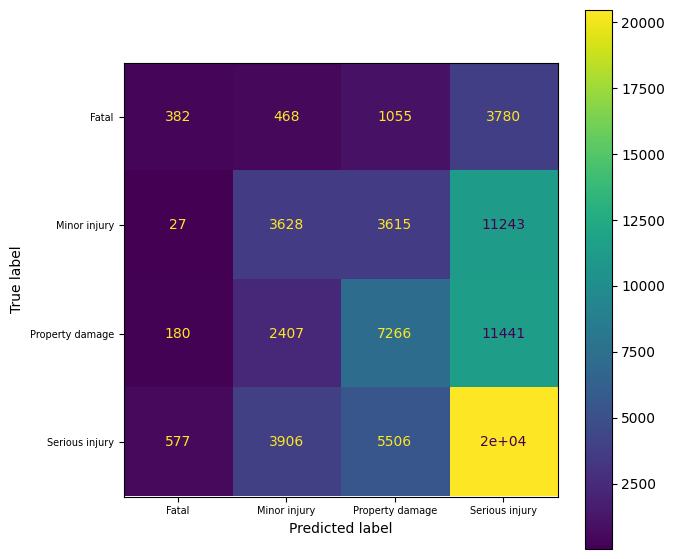

In [10]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'xgbclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_tomek, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
model_tomek = grid_search.best_estimator_
cv_results = grid_search.cv_results_
train_scores = cv_results['mean_train_score']
validation_scores = cv_results['mean_test_score']
print("Average training score: ", train_scores.mean())
print("Average validation score: ", validation_scores.mean())
evaluation_class_8(y_pred, y_test)
with open('Saved_models_remove/xgb_tomek.pkl', 'wb') as file:
    pickle.dump(model_tomek, file)

In [4]:
print(382/1166)
print(3628/10409)
print(7266/17442)
print((46927-577-3906-5506)/46927)

0.3276157804459691
0.34854452877317704
0.41658066735466115
0.7871374688345728
